# CAP 4910 Heart Disease - PCA

In [1]:
#Source of Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df= pd.read_csv('heart.csv')
df_0=pd.read_csv('heart.csv')

df_0['sex'] = df.sex.replace([1,0], ['male', 'female'])
df_0['cp'] = df.cp.replace([0,1,2,3], ['asymptomatic','atypical_ang', 'non-anginal pain', 'typical angina'])
df_0['fbs'] = df.fbs.replace([1,0], ['true', 'false'])
df_0['restecg'] = df.restecg.replace([0,1,2], [ 'prob_lvh', 'normal', 'st_abnormality'])
df_0['exang'] = df.exang.replace([0,1], ['no', 'yes'])
df_0['slope'] = df.slope.replace([0,1,2], ['downsloping','flat', 'upsloping'])
df_0['thal'] = df.thal.replace([1,2,3], ['fixed_def', 'normal', 'rev_def'])
df_0['target'] = df.target.replace([1,0], ['yes', 'no'])

In [5]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Heart Disease dataset

### age -
#### age in years
### sex -
#### (1 = male; 0 = female)
### cp-
#### chest pain type
### trestbps-
#### resting blood pressure (in mm Hg on admission to the hospital)
### chol-
#### serum cholestoral in mg/dl
### fbs-
#### (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### restecg-
#### resting electrocardiographic results
### thalach -
#### maximum heart rate achieved
### exang -
#### exercise induced angina (1 = yes; 0 = no)
### oldpeak-
#### ST depression induced by exercise relative to rest
### slope -
#### the slope of the peak exercise ST segment
### ca -
#### number of major vessels (0-3) colored by flourosopy
### thal -
#### 1 = fixed defect; 2 = normal, 3 = reversable defect

#The restecg, slope and oldpeak fields all relate to findings from an electrocardiogram. The graphic shows the components of a #normal ECG which measures voltage over time in the heart muscle. restecg is used to look for 2 specific abnormalities in the #resting ECG, while slope and oldpeak are both based on comparisons of the resting ECG and the ECG while excercising.

### Our target is to determine if the patient has heart disease or not

In [6]:
df['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Describing the dataset

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Make sure there are no nulls in data

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


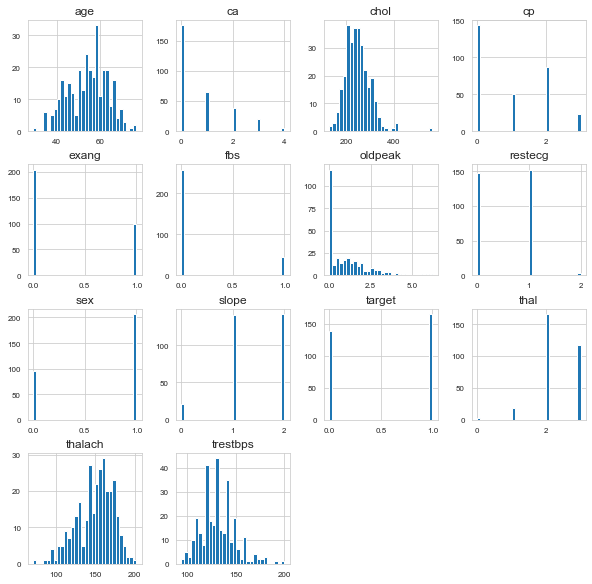

In [10]:
df.hist(figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8);

### Find some correlations

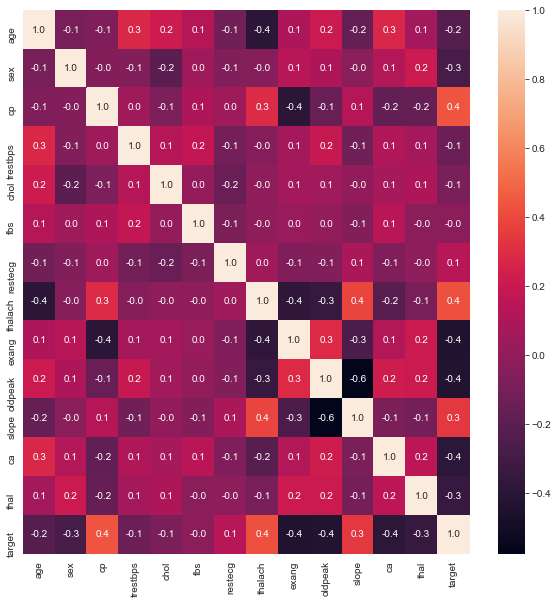

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [12]:
#High Correlations: 

##- thalach and slope
## - chest pain and thalach
## cholesterol and age
##cholesterol and oldspeak
##thalatch and slope

## Correlation between Slope and Thalatch

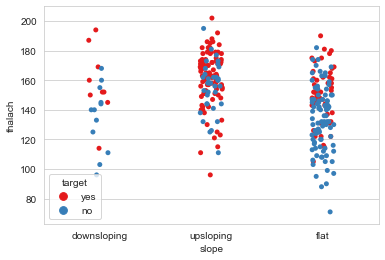

In [13]:
sns.stripplot(x="slope",y="thalach",data=df_0,jitter=True,hue='target',palette='Set1')

## Correlation between Chest Pain and Thalatch

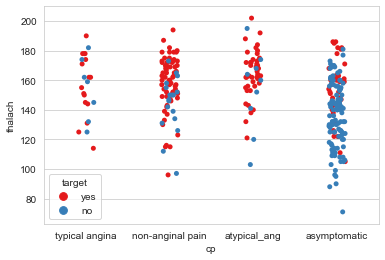

In [14]:
sns.stripplot(x="cp",y="thalach",data=df_0,jitter=True,hue='target',palette='Set1')

### Using sns to count plot df target.

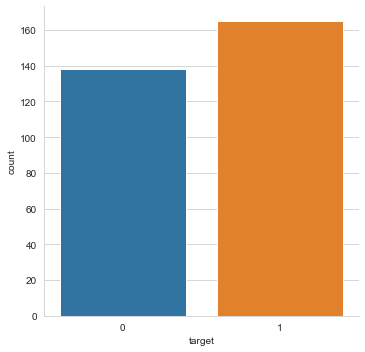

In [15]:
sns.catplot(x='target', kind='count', data=df);

Text(0.5, 1.0, 'KDE plot for Age vs Cholesterol depend on Type')

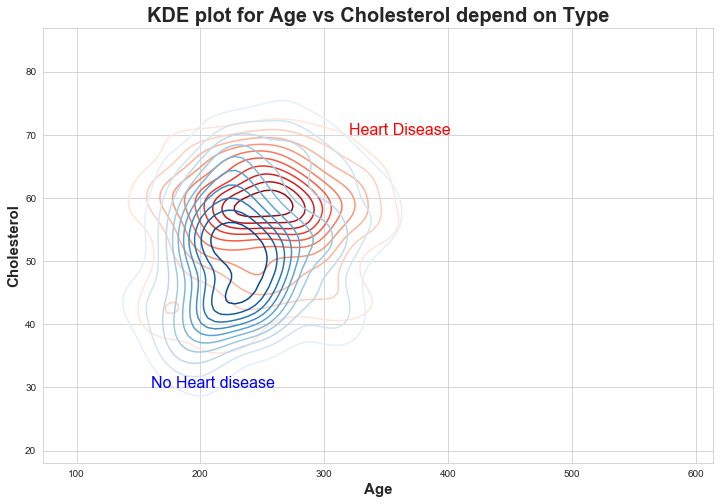

In [16]:
# Set up dataframe for each case
Negative=df[df['target']==0]
Positive=df[df['target']==1]

# Set UP figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.kdeplot(Negative['chol'], Negative['age'],
                 cmap="Reds", shade_lowest=False)
ax = sns.kdeplot(Positive['chol'], Positive['age'],
                 cmap="Blues", shade_lowest=False)

# Label
ax.text(160, 30, "No Heart disease", size=16, color='blue')
ax.text(320, 70, "Heart Disease", size=16, color='red')
ax.set_ylabel("Cholesterol", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel("Age", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_title("KDE plot for Age vs Cholesterol depend on Type", fontdict={'fontsize':20, 'fontweight':'bold'})

# Model

### Define X as dataset with target coumn and y as target column.

In [17]:
x = df.drop(['target'], axis=1)
y = df['target']

###  Split X_train, X_test, y_train, y_test with test_size=0.5, random_state=42

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

### Standardize X_train

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Use lr to train the training dataset.

In [20]:
lr= LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Test Accuracy: 0.816


### Use lr to predict and print confusion_matrix.

(2.0, 0)

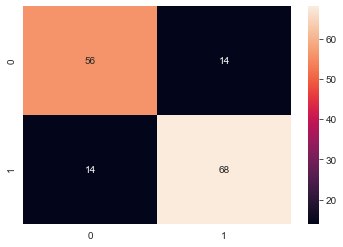

In [21]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set_ylim(2.0, 0)

In [22]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[56 14]
 [14 68]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        70
           1       0.83      0.83      0.83        82

    accuracy                           0.82       152
   macro avg       0.81      0.81      0.81       152
weighted avg       0.82      0.82      0.82       152



### Use random_state=101 to print print confusion_matrix.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=101)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
lr= LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Test Accuracy: 0.816


(2.0, 0)

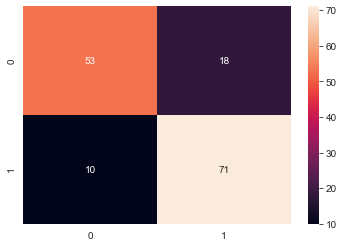

In [26]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set_ylim(2.0, 0)

In [27]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[53 18]
 [10 71]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        71
           1       0.80      0.88      0.84        81

    accuracy                           0.82       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.82      0.82      0.81       152



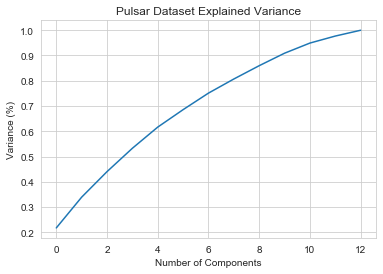

In [28]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

## Two random state show different results on different cases, especially on FN (bottom left number in confusion matrix), which can mean overfit.  Therefore, I will use PCA to reduce the dimensionality of a data set consisting of many variables correlated with each other.

### Define pca with n_components=60 percent variance

In [29]:
pca=PCA(n_components=0.60) 

### Train pca

In [30]:
pca.fit(X_train) 
X_pca=pca.transform(X_train) #transform the X_train data

X_pca_test=pca.transform(X_test) #transform X_test data (do not fit X_test data)

In [31]:
print("shape of X_pca", X_pca.shape)

shape of X_pca (151, 5)


In [32]:
# Train Regression Model with PCA
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Predict Results from PCA Model
y_pred = classifier.predict(X_pca_test)

### Plot pca , cmap='plasma'

Text(0.5, 0, 'Second Principal Component')

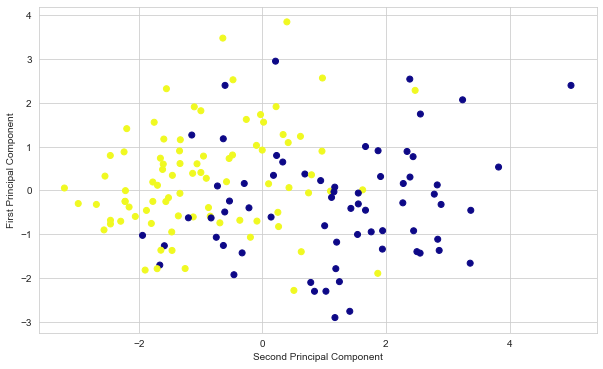

In [34]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='plasma')
plt.ylabel('First Principal Component')
plt.xlabel('Second Principal Component')

In [35]:
pca.components_

array([[ 0.35749697, -0.01733697, -0.27288067,  0.20859596,  0.15802865,
         0.11798105, -0.20229188, -0.38456786,  0.32156664,  0.44254076,
        -0.39354351,  0.190566  ,  0.18913713],
       [ 0.20074592, -0.22734373,  0.43014929,  0.47000357,  0.35649508,
         0.37593287, -0.2498164 ,  0.28436235, -0.27496119,  0.05019972,
         0.0376406 ,  0.01232996, -0.10347553],
       [-0.27153458,  0.55632667,  0.30291996,  0.14361514, -0.38878984,
         0.28412528,  0.03574022,  0.18208042, -0.00150352,  0.2748876 ,
        -0.25173356, -0.07154643,  0.30661753],
       [-0.16940968, -0.33067148,  0.1180367 , -0.09230478, -0.18861884,
         0.20720178,  0.02194204, -0.23516575,  0.05074236,  0.05862818,
        -0.44095784, -0.54271599, -0.4584903 ],
       [ 0.29602768, -0.03443568,  0.142282  , -0.18638468, -0.326611  ,
         0.22624553,  0.36672464, -0.20321298, -0.37448617,  0.08431844,
        -0.0582142 ,  0.54552986, -0.27242044]])

In [36]:
df_comp=pd.DataFrame(pca.components_, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']) 

In [37]:
df_comp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.357497,-0.017337,-0.272881,0.208596,0.158029,0.117981,-0.202292,-0.384568,0.321567,0.442541,-0.393544,0.190566,0.189137
1,0.200746,-0.227344,0.430149,0.470004,0.356495,0.375933,-0.249816,0.284362,-0.274961,0.050200,0.037641,0.012330,-0.103476
2,-0.271535,0.556327,0.302920,0.143615,-0.388790,0.284125,0.035740,0.182080,-0.001504,0.274888,-0.251734,-0.071546,0.306618
3,-0.169410,-0.330671,0.118037,-0.092305,-0.188619,0.207202,0.021942,-0.235166,0.050742,0.058628,-0.440958,-0.542716,-0.458490
4,0.296028,-0.034436,0.142282,-0.186385,-0.326611,0.226246,0.366725,-0.203213,-0.374486,0.084318,-0.058214,0.545530,-0.272420


### Print pca confusion_matrix

(2.0, 0)

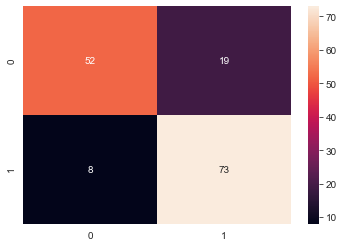

In [38]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set_ylim(2.0, 0)

In [39]:
pca.explained_variance_ratio_ #the first two components explains 33% of data

array([0.21723818, 0.12178157, 0.10108455, 0.09255234, 0.08381622])

In [40]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[52 19]
 [ 8 73]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        71
           1       0.79      0.90      0.84        81

    accuracy                           0.82       152
   macro avg       0.83      0.82      0.82       152
weighted avg       0.83      0.82      0.82       152



In [41]:
##Put this Data into Postgresql

In [42]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [102]:
import psycopg2
conn = psycopg2.connect("host=localhost dbname=postgres user=postgres password=Soley123!")

In [103]:
cur = conn.cursor()  #cur object calls executer method. If successful, will return None.

In [104]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [105]:
#Create table. This will make an SQL transaction
cur.execute("""
    CREATE TABLE heartDiseaseTable(
    id SERIAL PRIMARY KEY,
    age integer,
    sex integer,
    cp integer,
    trestbps integer,
    chol integer,
    fbs integer,
    restecg integer,
    thalach integer,
    exang integer,
    oldspeak float,
    slope integer,
    ca integer,
    thal integer,
    target integer
)
""")

DuplicateTable: relation "heartdiseasetable" already exists


In [106]:
conn.commit() #Commit the data

In [109]:
csv= df.to_csv('hd.csv')

with open('hd.csv', 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'HeartDiseaseTable', sep=',')


UniqueViolation: duplicate key value violates unique constraint "heartdiseasetable_pkey"
DETAIL:  Key (id)=(0) already exists.
CONTEXT:  COPY heartdiseasetable, line 1


In [108]:
conn.commit()